# [CS365 : Foundations of Data Science](https://tsourakakis.com/cs365-foundations-of-data-science-spring24/)
## Lectures 2, 3, 4
### Author: [Prof. Charalampos E. Tsourakakis](tsourakakis.com)

This notebook is written in [Julia 1.9](https://julialang.org/). For those who are not familiar with [Julia](https://julialang.org/), and wonder why one would like to use Julia, you can read this cool Manifesto by George Datseris [Why Julia - a Manifesto](https://github.com/Datseris/whyjulia-manifesto). One of the main reasons I suggest exploring Julia is its unique blend of features. It offers the interactive coding experience commonly associated with interpreted languages like Python, allowing for real-time coding adjustments. At the same time, it delivers performance on par with compiled, low-level languages such as C. This combination makes Julia a compelling choice for various programming tasks.

![image](./julia.png)





In [143]:
using Random 
using Plots
using StatsBase
using DataFrames
using Statistics

# Probability overview 

## Probability space 


A **Probability Space** is a mathematical construct in probability theory that provides a formal model for randomness and uncertainty. It is defined as a triple $(\Omega, \mathcal{F}, P)$ consisting of:

1. **Sample Space** ($\Omega$):
   - This is the set of all possible outcomes of a random experiment.
   - Example: For a coin toss, $\Omega = \{\text{heads}, \text{tails}\}$.

2. **Sigma-algebra** ($\mathcal{F}$):
   - Also known as a **sigma-field**, this is a collection of subsets of $\Omega$ that satisfies certain properties.
   - It includes the empty set and $\Omega$ itself, and is closed under the operations of complementation and countable unions.
   - Example: For a coin toss, $\mathcal{F} = \{\emptyset, \{\text{heads}\}, \{\text{tails}\}, \{\text{heads}, \text{tails}\}\}$.

3. **Probability Measure** ($P$):
   - A function that assigns a probability to each set in $\mathcal{F}$.
   - This function must satisfy three axioms:
     - **Non-negativity**: For every $A \in \mathcal{F}$, $P(A) \geq 0$.
     - **Normalization**: $P(\Omega) = 1$.
     - **Countable Additivity**: For any countable sequence of mutually exclusive sets $A_1, A_2, \ldots \in \mathcal{F}$, $P\left(\bigcup_{i=1}^{\infty} A_i\right) = \sum_{i=1}^{\infty} P(A_i)$.

The probability space thus provides a framework for calculating probabilities of events and understanding the behavior of random processes.



**Exercise**: Let $S$ be a sample space with probability measure $P$. Also, let $A$ and $B$ be any events in $S$. Then the following hold.

1. $P(A^c) = 1 - P(A)$
2. $P(\emptyset) = 0$

**Proof** 
 

(1) For the first property, note that by definition of the complement of an event $A$ we have

$$
A \cup A^c = S \quad \text{and} \quad A \cap A^c = \emptyset.
$$

In other words, given any event $A$, we can represent the sample space $S$ as a disjoint union of $A$ with its complement. Thus, by the first and third axioms, we derive the first property:

$$
1 = P(S) = P(A \cup A^c) = P(A) + P(A^c)
$$

which implies

$$
P(A^c) = 1 - P(A)
$$

(2) For the second property, note that we can write $S = S \cup \emptyset$, and that this is a disjoint union, since anything intersected with the empty set will necessarily be empty. So, using the first and third axioms, we derive the second property:

$$
1 = P(S) = P(S \cup \emptyset) = P(S) + P(\emptyset)
$$

which implies

$$
P(\emptyset) = 0
$$


Let's toss a fair coin $n_tosses=1000$ times and estimate the probability of observing heads using the fraction $$\frac{\# heads}{\# tosses}$$

In [1]:
coin_sides = ["Tails", "Heads"]
n_tosses = 1000

random_tosses = rand(coin_sides, n_tosses)

probability_heads = count(==("Heads"), random_tosses) / n_tosses
probability_tails = count(==("Tails"), random_tosses) / n_tosses

println("Probability of Heads: ", probability_heads)
println("Probability of Tails: ", probability_tails)


Probability of Heads: 0.534
Probability of Tails: 0.466


Let's plot the empirical probability of observing Heads vs the number of tosses.   

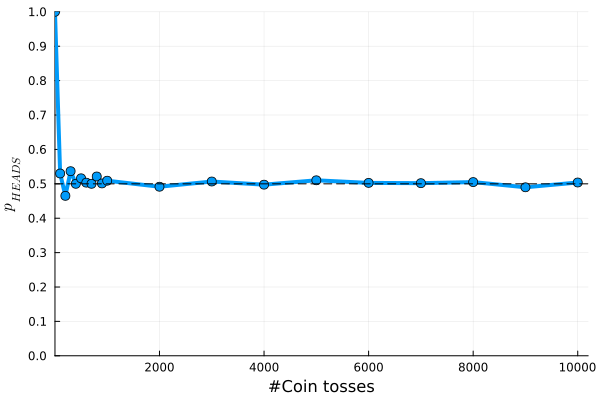

In [117]:
coin_tosses = union([1],  (100:100:1000),  (2000:1000:10000) )

p = Float64[]

for n_tosses in coin_tosses
    random_tosses = rand(coin_sides, n_tosses)
    probability_heads = count(==("Heads"), random_tosses) / n_tosses
    push!(p, probability_heads)
end


selected_xticks = [coin_tosses[1], coin_tosses[5], coin_tosses[10], coin_tosses[15], coin_tosses[end-1], coin_tosses[end]]

plot(coin_tosses, p,  legend=false, xlims=(1, 10200), ylims=(0, 1), yticks=0:0.1:1, line=:line, marker=:circle, markersize=5, linewidth=4) 
hline!([0.5], line=:dash, color=:black)
xlabel!("#Coin tosses")
ylabel!("\$ p_{HEADS} \$")



## More examples  of Probability Spaces

### 1. Roll of a Die

- **Sample Space** ($\Omega$): The set of outcomes when a fair six-sided die is rolled.
  - $\Omega = \{1, 2, 3, 4, 5, 6\}$

- **Sigma-algebra** ($\mathcal{F}$): The power set of $\Omega$, which includes all subsets of $\Omega$.
  - For simplicity, let's consider $\mathcal{F} = \{\emptyset, \Omega, \{1\}, \{2\}, \ldots, \{6\}, \{1, 2\}, \ldots\}$

- **Probability Measure** ($P$): Each outcome is equally likely.
  - $P(\{i\}) = \frac{1}{6}$ for each $i \in \Omega$
  
Let's conduct a simulation of die rolls and create a bar chart to display the observed frequencies for each face of the die.


In [11]:
die = 1:6 
n_tosses = 10000 
random_tosses = rand(die, n_tosses)
prob = Dict{Int64, Float64}()

for side in die
    prob[side] = count(==(side), random_tosses)/n_tosses
end 

println(prob)

Dict(5 => 0.1674, 4 => 0.166, 6 => 0.1702, 2 => 0.1666, 3 => 0.1642, 1 => 0.1656)


1.0365408038976855


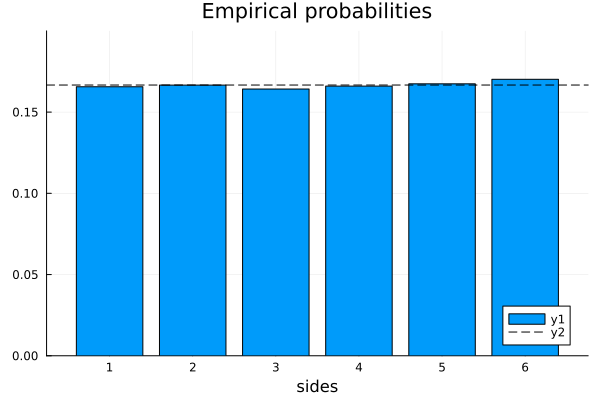

In [18]:

keys_list = collect(keys(prob))
values_list = collect(values(prob))
        
println(maximum(values_list)/minimum(values_list))
    
bar(keys_list, values_list, xlabel="sides",   title="Empirical probabilities", ylim=(0,0.2))
hline!([1/6], line=:dash, color=:black)


Let's plot the ratio of the most frequent to the least frequent empirical probability. As the number of tosses increases, we expect it to approach to 1. 


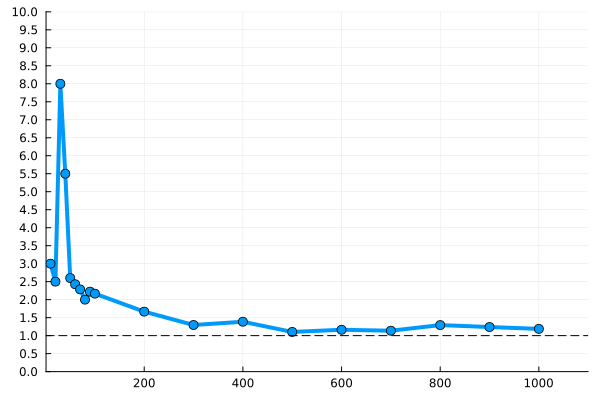

In [43]:
die_tosses = union( (10:10:100),  (200:100:1000))

ratios = Float64[]

for n_tosses in die_tosses
    random_tosses = rand(die, n_tosses)
    prob = Dict(side => count(==(side), random_tosses)/n_tosses for side in die)
    values_list = collect(values(prob))
    push!(ratios, maximum(values_list)/minimum(values_list))
end



plot(die_tosses, ratios,  legend=false, xlims=(1, 1100), ylims=(0, 10), yticks=0:0.5:10, line=:line, marker=:circle, markersize=5, linewidth=4) 
hline!([1], line=:dash, color=:black)
 

In [44]:
ratios

19-element Vector{Float64}:
 2.9999999999999996
 2.5
 8.0
 5.5
 2.6
 2.4285714285714284
 2.2857142857142856
 2.0
 2.222222222222222
 2.166666666666667
 1.6666666666666665
 1.2954545454545454
 1.3859649122807018
 1.1025641025641024
 1.1630434782608696
 1.1363636363636365
 1.293103448275862
 1.2388059701492538
 1.1879194630872483

# Random Variables

## What is a Random Variable

A **Random Variable** is a variable that takes on different values determined by the outcomes of a random process. Formally, it is a function that maps outcomes from the sample space of a probability experiment to real numbers.

- **Formal Definition**: Given a probability space $(\Omega, \mathcal{F}, P)$, a random variable $X$ is a function $X: \Omega \rightarrow \mathbb{R}$, such that for every real number $x$, the set $\{\omega \in \Omega : X(\omega) \leq x\}$ belongs to $\mathcal{F}$.


Random variables are used to quantify the outcomes of random processes and to conduct probability and statistical analysis. For example, if we toss the coin twice, there exist four possible events that define our sample space $\{ \omega_1=(H, H), \omega_2=(T,T) , \omega_3=(H,T), \omega_4=(T,H) \}$. An example of a random variable is the number of heads in this experiment. For example $X(\omega_1)=2$ and $X(\omega_4)=1$. 

**Exercise** Give some more examples of random variables. 


 
## What is a Discrete Random Variable

A **Discrete Random Variable** is a type of random variable that can take on a countable number of distinct values. The values can be finite or countably infinite.

- **Characteristics**:
  - The probability distribution can be described using a probability mass function (PMF).
  - Examples include the number of heads in coin tosses, the number of red cards drawn from a deck, etc.
- **Probability Mass Function (PMF)**: For a discrete random variable $X$, the PMF is given by $p_X(x)=P(X = x)$, which provides the probability that $X$ takes the value $x$. 

In the example where we flip a fair coin twice, the probability mass function (pmf) is as follows: 

$$p_X(0)=\frac{1}{4}, p_X(1)=\frac{1}{2}, p_X(2)=\frac{1}{4}.$$


Let's explore some significant discrete probability distributions, beginning with the one named after Jacob Bernoulli, who lived from  1655 to  1705. The Bernoulli family made remarkable scientific contributions that are worth noting.

![image](./bernoullifamilytree.png)


Image source: [Galileo unbound](https://galileo-unbound.blog/2020/10/06/the-bountiful-bernoulli-of-basel/)




### Bernoulli Distribution 

A random variable $X$ follows the Bernoulli distribution $Ber(X;p)$ or $Ber(X|p)$ if

$$
Pr(X=x)= 
\begin{cases} 
1 - p & \text{if } x = 0 \\
p & \text{if } x = 1
\end{cases}
$$





In [57]:
Base.@kwdef struct Bernoulli 
    p::Float64 = 0.5
end    


function simulate(trial::Bernoulli)
    return rand() < trial.p ? 1 : 0
end


ber = Bernoulli()

for i in 1:10
    😺 = simulate(ber)
    println("Result of $(i)-th simulation of Bernoulli with p=$(ber.p) is $(😺)")
end

Result of 1-th simulation of Bernoulli with p=0.5 is 1
Result of 2-th simulation of Bernoulli with p=0.5 is 1
Result of 3-th simulation of Bernoulli with p=0.5 is 1
Result of 4-th simulation of Bernoulli with p=0.5 is 1
Result of 5-th simulation of Bernoulli with p=0.5 is 0
Result of 6-th simulation of Bernoulli with p=0.5 is 0
Result of 7-th simulation of Bernoulli with p=0.5 is 0
Result of 8-th simulation of Bernoulli with p=0.5 is 1
Result of 9-th simulation of Bernoulli with p=0.5 is 0
Result of 10-th simulation of Bernoulli with p=0.5 is 1


In [58]:
ber_certainty = Bernoulli(1)

for i in 1:10
    😺 = simulate(ber_certainty)
    println("Result of $(i)-th simulation of Bernoulli with p=$(ber_certainty.p) is $(😺)")
end

Result of 1-th simulation of Bernoulli with p=1.0 is 1
Result of 2-th simulation of Bernoulli with p=1.0 is 1
Result of 3-th simulation of Bernoulli with p=1.0 is 1
Result of 4-th simulation of Bernoulli with p=1.0 is 1
Result of 5-th simulation of Bernoulli with p=1.0 is 1
Result of 6-th simulation of Bernoulli with p=1.0 is 1
Result of 7-th simulation of Bernoulli with p=1.0 is 1
Result of 8-th simulation of Bernoulli with p=1.0 is 1
Result of 9-th simulation of Bernoulli with p=1.0 is 1
Result of 10-th simulation of Bernoulli with p=1.0 is 1


### Binomial distribution 

The binomial distribution has two parameters $N$ and $p$. $N$ is a positive integer and $p$ a probability. 
It is the distribution of the number of successes in a sequence of $N$ independent experiment, each having a probability $p$ of success.  A binomial random variable can be written as the sum of N iid (independent identically distributed) Bernoulli $Ber(p)$ random variables. When $N=1$, the binomial random variable is the same as a Bernoulli random variable.   The binomial distribution for a rv $X \sim Bin(N,p)$ is defined by:

$$
Bin(k|N,p)\equiv Pr(X=k) =  \binom{N}{k} p^k (1 - p)^{N-k}
$$

where $\binom{N}{k} \equiv \frac{N!}{(N-k)!k!}$ is the number of ways to choose $k$ items from $N$ (this is known as the binomial coefficient, and is pronounced "N choose k").


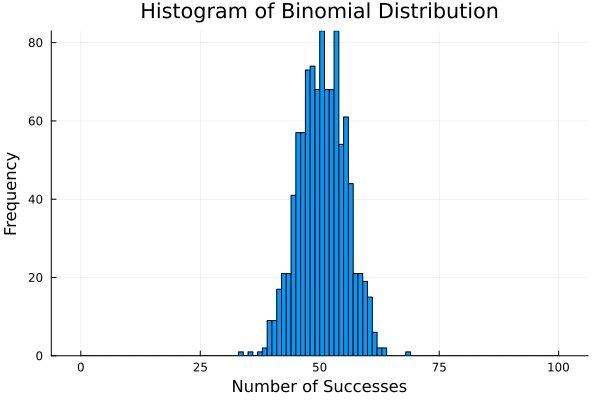

In [62]:
Base.@kwdef struct BinomialRV
    n::Int = 1000
    p::Float64 = 0.5
end

function simulate(binom_rv::BinomialRV)
    successes = sum(rand() < binom_rv.p for _ in 1:binom_rv.n)
    return successes
end

function generate_samples(binom_rv::BinomialRV, num_samples::Int)
    return [simulate(binom_rv) for _ in 1:num_samples]
end

# Example usage: generate 1000 samples from a Binomial distribution with n=100 and p=0.5
binom_rv = BinomialRV(n=100, p=0.5)
samples = generate_samples(binom_rv, 1000)

histogram(samples, bins=0:binom_rv.n, legend=false,
          xlabel="Number of Successes", ylabel="Frequency",
          title="Histogram of Binomial Distribution")


### Discrete uniform 

The discrete uniform distribution is a symmetric probability distribution wherein a finite number of values are equally likely to be observed. For example, the outcome of a fair die follows the discrete uniform distribution with the set of possible values being $\{1,..,6\}$. 

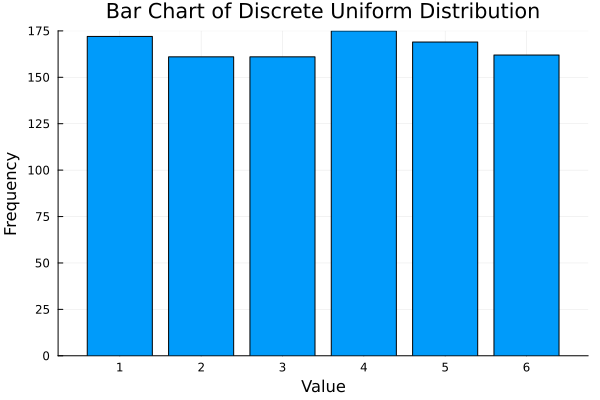

In [69]:
Base.@kwdef struct DiscreteUniformRV #special case of a discrete uar, could be a set rather than a range
    a::Int=0  # Lower bound
    b::Int=1  # Upper bound, for these default values this is a Bernoulli(0.5)
end

function simulate(du_rv::DiscreteUniformRV)
    return rand(du_rv.a:du_rv.b)
end


# Generate discrete uniform samples
function generate_samples(du_rv::DiscreteUniformRV, num_samples::Int)
    return [simulate(du_rv) for _ in 1:num_samples]
end

# Example usage: generate 1000 samples from a Discrete Uniform distribution with bounds a=1, b=6
du_rv = DiscreteUniformRV(a=1, b=6)
samples = generate_samples(du_rv, 1000)

# Calculate frequencies for each outcome
frequencies = countmap(samples)

# Plot the bar chart
bar(collect(du_rv.a:du_rv.b), [get(frequencies, x, 0) for x in du_rv.a:du_rv.b],
    legend=false, xlabel="Value", ylabel="Frequency",
    title="Bar Chart of Discrete Uniform Distribution")

### Multinomial distribution

Suppose an experiment is conducted where $n$ balls are drawn from a bag containing balls of $k$ different colors, with each draw being replaced. Balls of the same color are considered indistinguishable. Let  $ X_i$  represent the random variable corresponding to the count of balls of color $i$ (where  $ i = 1, \ldots, k $) that have been drawn, and let  $ p_i$ denote the probability of drawing a ball of color $i$ in a single trial. The probability mass function (PMF) for the multinomial distribution is given by:

$$
f(x_1, \ldots, x_k; n, p_1, \ldots, p_k) = Pr(X_1 = x_1 \text{ and } \ldots \text{ and } X_k = x_k) =
\begin{cases}
\frac{n!}{x_1! \cdots x_k!} p_1^{x_1} \cdots p_k^{x_k}, & \text{when } \sum_{i=1}^{k} x_i = n, \\
0, & \text{otherwise},
\end{cases}
$$

where the  $x_i$ are non-negative integers that represent the count of occurrences for each color and must sum to  $n$.

The PMF can also be expressed using the gamma function for a more generalized formulation:

$$
f(x_1, \ldots, x_k; p_1, \ldots, p_k) = \frac{\Gamma(\sum_{i=1}^{k} x_i + 1)}{\prod_{i=1}^{k} \Gamma(x_i + 1)} \prod_{i=1}^{k} p_i^{x_i}.
$$

Here, \( \Gamma \) represents the gamma function, which generalizes the factorial function with \( \Gamma(n) = (n-1)! \) for an integer \( n \).


In [88]:
struct MultinomialRV
    outcomes_probs::Dict{Any, Float64}
    n::Int   
end


function simulate(multinomial_rv::MultinomialRV)
    outcomes = collect(keys(multinomial_rv.outcomes_probs))
    probabilities = collect(values(multinomial_rv.outcomes_probs))
    multinomial_dist = Multinomial(multinomial_rv.n, probabilities)
    sample = rand(multinomial_dist)
    return Dict(zip(outcomes, sample))
end

function generate_samples(multinomial_rv::MultinomialRV, num_samples::Int)
    return [simulate(multinomial_rv) for _ in 1:num_samples]
end

outcomes_probs = Dict("A" => 0.2, "B" => 0.3, "C" => 0.5)
multinomial_rv = MultinomialRV(outcomes_probs, 100)  # 10 trials
samples = generate_samples(multinomial_rv, 1000)


1000-element Vector{Dict{Any, Int64}}:
 Dict("B" => 29, "A" => 15, "C" => 56)
 Dict("B" => 27, "A" => 24, "C" => 49)
 Dict("B" => 29, "A" => 23, "C" => 48)
 Dict("B" => 25, "A" => 28, "C" => 47)
 Dict("B" => 37, "A" => 12, "C" => 51)
 Dict("B" => 19, "A" => 23, "C" => 58)
 Dict("B" => 30, "A" => 19, "C" => 51)
 Dict("B" => 31, "A" => 15, "C" => 54)
 Dict("B" => 29, "A" => 15, "C" => 56)
 Dict("B" => 30, "A" => 21, "C" => 49)
 Dict("B" => 30, "A" => 23, "C" => 47)
 Dict("B" => 31, "A" => 23, "C" => 46)
 Dict("B" => 26, "A" => 18, "C" => 56)
 ⋮
 Dict("B" => 24, "A" => 22, "C" => 54)
 Dict("B" => 39, "A" => 19, "C" => 42)
 Dict("B" => 31, "A" => 21, "C" => 48)
 Dict("B" => 26, "A" => 15, "C" => 59)
 Dict("B" => 28, "A" => 21, "C" => 51)
 Dict("B" => 34, "A" => 22, "C" => 44)
 Dict("B" => 27, "A" => 19, "C" => 54)
 Dict("B" => 31, "A" => 17, "C" => 52)
 Dict("B" => 32, "A" => 22, "C" => 46)
 Dict("B" => 31, "A" => 22, "C" => 47)
 Dict("B" => 29, "A" => 22, "C" => 49)
 Dict("B" => 37, "A" =

### Poisson distribution 

A discrete random variable $X$ is said to have a Poisson distribution, with parameter $\lambda > 0$, if it has a probability mass function given by:

$$
f(k; \lambda) \equiv Pr(X=k) = \frac{\lambda^k e^{-\lambda}}{k!},
$$

where

- $k$ is the number of occurrences $(k = 0, 1, 2, \ldots)$
- $e$ is Euler's number $(e \approx 2.71828\ldots)$
- $k!$ is the factorial of $k$.

We will use the package *Distributions*  to simulate the Poisson.

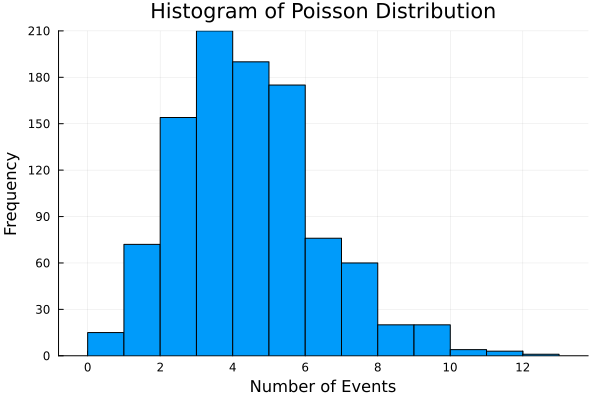

In [81]:
using Distributions 

Base.@kwdef struct PoissonRV
    λ::Float64  # Rate parameter (lambda)
end
 

# Simulate function for a Poisson random variable
function simulate(poisson_rv::PoissonRV)
    poisson_dist = Poisson(poisson_rv.λ)
    return rand(poisson_dist)
end
    
# Generate Poisson samples
function generate_samples(poisson_rv::PoissonRV, num_samples::Int)
    return [simulate(poisson_rv) for _ in 1:num_samples]
end

# Example usage: generate 1000 samples from a Poisson distribution with λ=4.0
poisson_rv = PoissonRV(λ=4.0)
samples = generate_samples(poisson_rv, 1000)

# Plot the histogram
histogram(samples, bins=0:maximum(samples)+1, legend=false,
          xlabel="Number of Events", ylabel="Frequency",
          title="Histogram of Poisson Distribution")


Poisson distribution models several real-world processes. 

- Number of Calls: The number of calls received by a call center in an hour.
- Public Transport: The number of buses arriving at a bus stop in a given period of time.
- Website Traffic: The number of visits to a website in a day.
- Mail Reception: The number of mail or packages a post office receives per day.
- Biology: The number of times a bacterium divides over a fixed time interval.
- Defects in Manufacturing: The number of defects found in a batch of products.
- Natural Events: The number of natural occurrences, such as earthquakes in a region over a year. 

The distribution is named after the French mathematician and physicist [Simon Denis Poisson](https://en.wikipedia.org/wiki/Sim%C3%A9on_Denis_Poisson)


![image](./poisson.webp)

### Geometric random variable 

The geometric distribution gives the probability that the first occurrence of success requires $k$ independent trials, each with success probability $p$. If the probability of success on each trial is $p$, then the probability that the $k$-th trial is the first success is

$$ Pr(X = k) = (1 - p)^{k-1} p,   k = 1, 2, 3, 4, \ldots$$

  



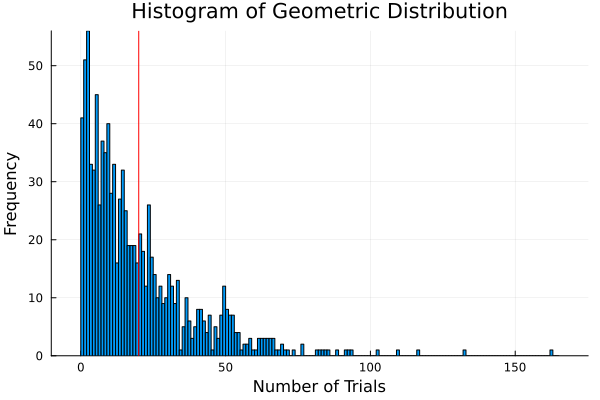

In [99]:
@kwdef struct GeometricRV
    p::Float64=0.5
end

 
function simulate(geom_rv::GeometricRV)
    return rand(Geometric(geom_rv.p))
end

function generate_samples(geom_rv::GeometricRV, num_samples::Int)
    return [simulate(geom_rv) for _ in 1:num_samples]
end

# Example usage: generate 1000 samples from a Geometric distribution with p=0.05
geom_rv = GeometricRV(p=0.05)
samples = generate_samples(geom_rv, 1000)

# Plot the histogram
histogram(samples, bins=0:maximum(samples), legend=false,
          xlabel="Number of Trials", ylabel="Frequency",
          title="Histogram of Geometric Distribution")

# Plot a vertical line at the expected value 1/p
vline!([1/geom_rv.p], label="Expected value", color=:red)


In [98]:
println("Empirical mean $(mean(samples)), and  1/p=$(1/0.05)")


Empirical mean 19.538, and  1/p=20.0


The geometric distribution is a special case of a negative binomial random variable that we discuss next. 

### Negative binomial random variable
 

Suppose we have an "urn" with $N$ balls, $R$ of which are red and $B$ of which are blue. We consider drawing a red ball a "failure", and drawing a blue ball a "success". Suppose we keep drawing balls until we observe $r$ failures. Let $X$ be the resulting number of successes (blue balls); it can be shown that $X \sim NegBinom(r, p)$, which is the negative binomial distribution defined by

$$
NegBinom(x|r, p) \equiv \binom{x + r - 1}{x} (1 - p)^r p^x
$$

for $x \in \{0, 1, 2, \ldots\}$. (If $r$ is real-valued, we replace $\binom{x + r - 1}{x}$ with $\frac{\Gamma(x + r)}{x!\Gamma(r)}$, exploiting the fact that $(x - 1)! = \Gamma(x)$.)

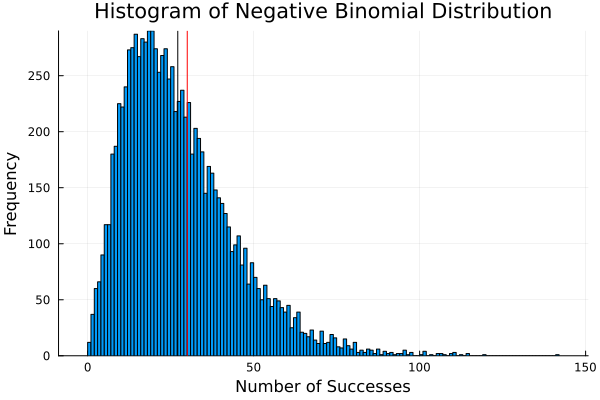

In [107]:

@kwdef struct NegativeBinomialRV
    r::Int=1        # Number of failures until stopping, by default we set it a Geom(p)
    p::Float64=0.1  # Probability of success
end


# Simulate function for a Negative Binomial random variable
function simulate(negbin_rv::NegativeBinomialRV)
    return rand(NegativeBinomial(negbin_rv.r, negbin_rv.p))
end

# Generate negative binomial samples
function generate_samples(negbin_rv::NegativeBinomialRV, num_samples::Int)
    return [simulate(negbin_rv) for _ in 1:num_samples]
end

# Example usage: generate 1000 samples from a Negative Binomial distribution with r=3, p=0.5
negbin_rv = NegativeBinomialRV(r=3, p=0.1)
samples = generate_samples(negbin_rv, 10000)

# Calculate the empirical mean of the samples
empirical_mean = mean(samples)

# Plot the histogram
histogram(samples, bins=0:maximum(samples)+1, legend=false,
          xlabel="Number of Successes", ylabel="Frequency",
          title="Histogram of Negative Binomial Distribution")

# Plot a vertical line at the expected value r/p
vline!([negbin_rv.r/negbin_rv.p], label="Mean value", color=:red)
    vline!([mean(samples)], label="Expected value", color=:black)


## What is a Continuous Random Variable

A **Continuous Random Variable** is a random variable that can take on an infinite number of possible values, typically any value within an interval on the real number line.

- **Characteristics**:
  - The probability distribution is described using a probability density function (PDF).
  - Examples include the exact height of students in a class, the time it takes for a chemical reaction to complete, etc.
- **Probability Density Function (PDF)**: For a continuous random variable $X$, the PDF, denoted as $f(x)$, is such that the probability that $X$ is in the interval $(a, b)$ is given by the integral $\int_{a}^{b} f(x) dx$.

In both discrete and continuous random variables, the main goal is to study the behavior of these variables and use them to make predictions or inferences about the underlying random processes.


### Gaussian distribution 

A univariate distribution we will come across a lot is the Gaussian distribution. The pdf (probability density function) of the Gaussian is given by

$$
\mathcal{N}(x;\mu, \sigma^2) \equiv \mathcal{N}(x|\mu, \sigma^2) \equiv f_X(x)=\frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{1}{2\sigma^2}(x-\mu)^2}
$$

The cumulative distribution function or cdf of the Gaussian is defined as

$$
\Phi(x;\mu,\sigma^2) \equiv \int_{-\infty}^{x} \mathcal{N}(z|\mu, \sigma^2) dz
$$

If $\mu = 0$ and $\sigma = 1$ (known as the standard normal distribution or just the normal distribution), we just write $\Phi(x)$.



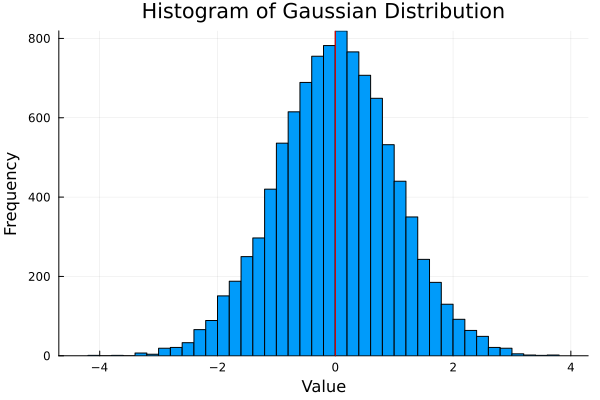

In [123]:
@kwdef struct GaussianRV
    μ::Float64=0  # Mean
    σ²::Float64=1  # Variance
end
 

function simulate(gaussian_rv::GaussianRV)
    σ = sqrt(gaussian_rv.σ²)  # Standard deviation is the square root of the variance
    return rand(Normal(gaussian_rv.μ, σ))
end

function generate_samples(gaussian_rv::GaussianRV, num_samples::Int)
    return [simulate(gaussian_rv) for _ in 1:num_samples]
end

gaussian_rv = GaussianRV(μ=0, σ²=1)
samples = generate_samples(gaussian_rv, 10000)

empirical_mean = mean(samples)

# Plot the histogram
histogram(samples, bins=50, legend=false,
          xlabel="Value", ylabel="Frequency",
          title="Histogram of Gaussian Distribution")

# Plot a vertical line at the mean μ
vline!([gaussian_rv.μ], label="Mean", color=:red)



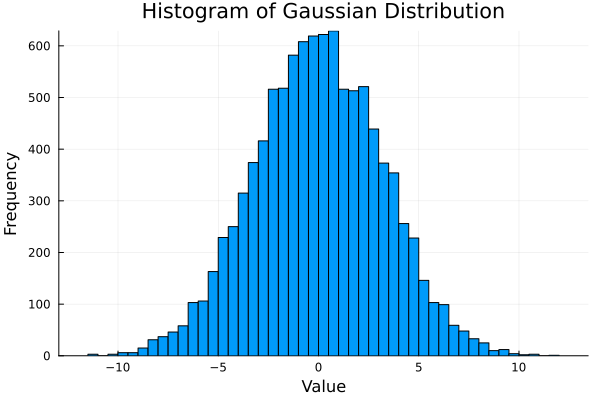

In [124]:
gaussian_rv = GaussianRV(μ=0, σ²=10)
samples2 = generate_samples(gaussian_rv, 10000)


histogram(samples2, bins=50, legend=false,
          xlabel="Value", ylabel="Frequency",
          title="Histogram of Gaussian Distribution")


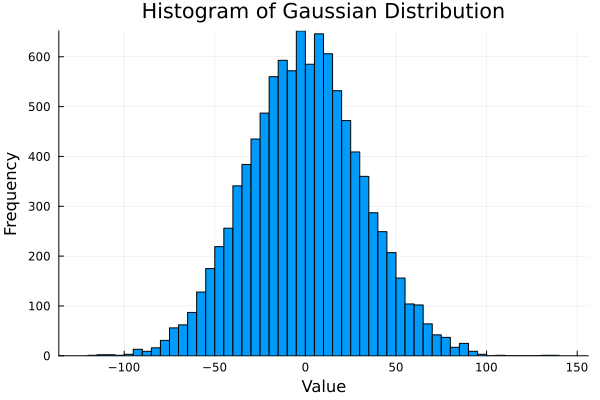

In [125]:
gaussian_rv = GaussianRV(μ=0, σ²=1000)
samples2 = generate_samples(gaussian_rv, 10000)


histogram(samples2, bins=50, legend=false,
          xlabel="Value", ylabel="Frequency",
          title="Histogram of Gaussian Distribution")


### Laplace distribution


Another important distribution with heavy tails is the Laplace distribution. It also has two parameters like the Gaussian  $\mu$ is a location parameter and $b > 0$ is a scale parameter.  The pdf is the following: 

$$
Laplace(x|\mu, b) \equiv \frac{1}{2b} \exp \left(-\frac{|x - \mu|}{b}\right)
$$



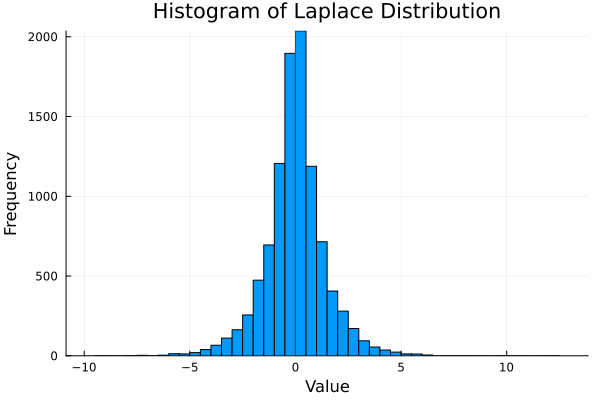

In [130]:
@kwdef struct LaplaceRV
    μ::Float64=0  # Mean
    b::Float64=1  # scale parameter
end
 

function simulate(laplace_rv::LaplaceRV)
    return rand(Laplace(laplace_rv.μ, laplace_rv.b))
end

function generate_samples(laplace_rv::LaplaceRV, num_samples::Int)
    return [simulate(laplace_rv) for _ in 1:num_samples]
end

laplace_rv = LaplaceRV(μ=0, b=1)
samples = generate_samples(laplace_rv, 10000)


histogram(samples, bins=50, legend=false,
          xlabel="Value", ylabel="Frequency",
          title="Histogram of Laplace Distribution")

vline!([laplace_rv.μ], label="Mean", color=:red)



### Beta distribution 


The beta distribution is an important distribution that yields the uniform distribution as a special case. It has support over the interval [0, 1] and is defined by the following pdf: 

$$
Beta(x|a, b) = \frac{1}{B(a, b)}x^{a-1}(1 - x)^{b-1}
$$

where $ B(a, b)$ is the beta function. The parameters $a,b>0$ are positive to ensure that $B(a,b)$ exists. When a=b=1 we get the uniform distribution.  


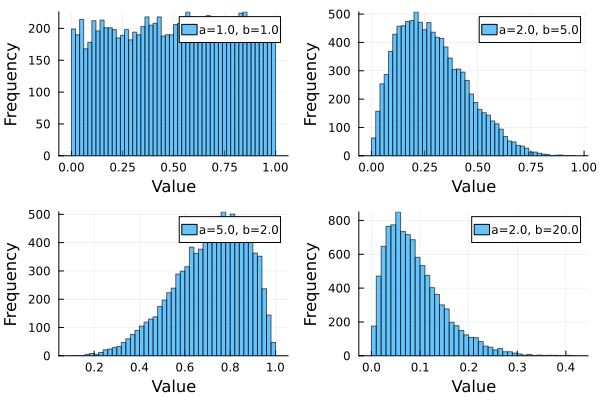

In [139]:
using Distributions
using Plots

# Number of samples to draw
num_samples = 10000

# Define parameters for the beta distributions
params = [(1, 1), (2, 5), (5,2), (2, 20)]

# Create beta distribution objects with the specified parameters
distributions = [Beta(a, b) for (a, b) in params]

# Generate samples and plot histograms for each set of parameters
histograms = []
for dist in distributions
    samples = rand(dist, num_samples)
    push!(histograms, histogram(samples, bins=50, alpha=0.6, label="a=$(dist.α), b=$(dist.β)"))
end

# Combine the histograms into a single plot
plot(histograms..., layout=(2,2), legend=:topright, xlabel="Value", ylabel="Frequency") 


Let's view the pdfs of Normal, Laplace and Uniform.

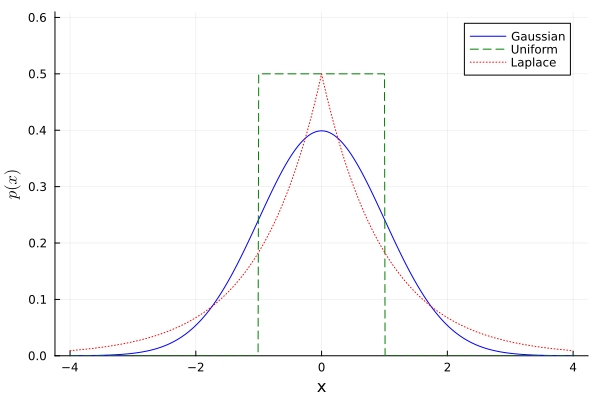

In [140]:
function draw_distributions(x)
    normal_dist = pdf.(Normal(0, 1), x)
    uniform_dist = pdf.(Uniform(-1, 1), x)
    laplace_dist = pdf.(Laplace(0, 1), x)

    plot(x, normal_dist, color="blue", linestyle=:solid, label="Gaussian")
    plot!(x, uniform_dist, color="green", linestyle=:dash, label="Uniform")
    plot!(x, laplace_dist, color="red", linestyle=:dot, label="Laplace")

    ylims!(0, 0.61)
    xlabel!("x")
    ylabel!("\$p(x)\$") 
end

x = -4:0.01:4
draw_distributions(x)


## Algorithm for Estimating π using 2d  uniform random variables 


To estimate the value of π, we can employ a simple yet effective algorithm involving random point generation within a unit square. Here's how the process works:

1. Begin by generating a series of  n random points with coordinates $(x,y)$ such that each point lies within the confines of a unit square, specifically in the interval [0,1] for both x and y. 

2. For each generated point, determine whether it resides within the quarter circle inscribed within the unit square. The quarter circle is defined by the area where $$x^2 + y^2 \leq 1$$

3. Count the number of points that fall inside the quarter circle. Denote this count as $ S_n $.

4. The estimate for π is then calculated using the ratio of the number of points inside the quarter circle to the total number of points, multiplied by 4. Mathematically, this estimate is represented as:

$$ \hat{\pi} = 4 \times \frac{S_n}{n} $$

This algorithm is grounded in the principles of geometric probability and leverages the area of a circle in relation to the square that encloses it. Since the area of the circle is π times the radius squared and the radius of the inscribed quarter circle is 1, the ratio of the areas is π/4. Therefore, as the number of random points increases, the proportion within the quarter circle should converge to π/4, making the algorithm a practical approach to approximating π.

π estimate 3.19


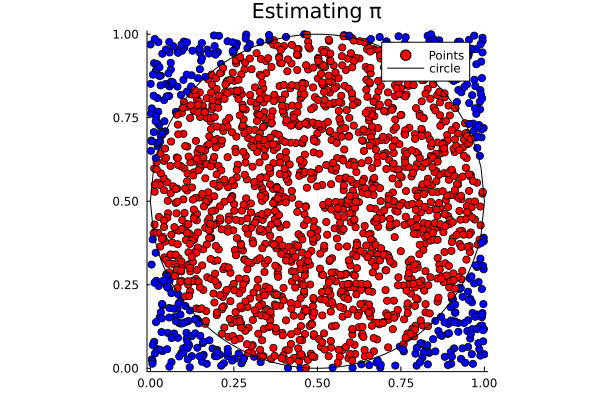

In [148]:
function approximate_pi(n_exp=100)
    df = DataFrame(x=[], y=[], inside=[])
    for i in 1:n_exp
        x, y = rand(), rand()
        push!(df, (x, y, (x-0.5)^2 + (y-0.5)^2 <= 0.5^2))
    end
    pi_estimate = 4 * mean(df[!, :inside])
    println("π estimate ", pi_estimate)
    return pi_estimate, df
end

n_exp = 2000
pi_estimate, df = approximate_pi(n_exp)

colors = [flag ? :red : :blue for flag in df[!, :inside]]

scatter(df[!, :x], df[!, :y], color=colors, xlims=(-0.01, 1.01), ylims=(-0.01, 1.01), label="Points", title="Estimating π", aspect_ratio=:equal)
plot!(0:0.01:1, x -> sqrt(0.5^2 - (x - 0.5)^2) + 0.5, color=:black, label="circle")
plot!(0:0.01:1, x -> -sqrt(0.5^2 - (x - 0.5)^2) + 0.5, color=:black, label="")


## Expectation, Variance and Moments of random variables

For a **discrete random variable**  $X$ with possible values $x_i$ and corresponding probabilities $P(X = x_i) $, the expectation or expected value is calculated as:

$$
E[X] = \sum_{i} x_i P(X = x_i)
$$

For a **continuous random variable**  $X$ with probability density function $f(x)$, the expectation is given by the integral:

$$
E[X] = \int_{-\infty}^{\infty} x f(x) dx
$$


The variance of a **discrete random variable**  $X$, denoted by $Var(X)$ or $\sigma^2$, is the expected value of the squared deviation from the mean  $ \mu = E[X]$:

$$
Var(X) = E[(X - \mu)^2] = \sum_{i} (x_i - \mu)^2 P(X = x_i)
$$

The variance of a **continuous random variable** $X$ with probability density function  $ f(x) $ is similarly defined as:

$$
Var(X) = \int_{-\infty}^{\infty} (x - \mu)^2 f(x) dx
$$

Variance measures the spread of the random variable's possible values from the mean, indicating the degree of dispersion or concentration around the expected value.

In the realm of probability and statistics, moments are a set of measures that provide significant insights into the shape and characteristics of a probability distribution. Specifically, the moments of a random variable offer a systematic way to describe various aspects of its distribution.

The **k-th moment** of a random variable $X$, denoted as $M_k(X)$, is defined mathematically as the expected value of $X$ raised to the power of $k$:

$$
M_k(X) = E[X^k]
$$

This definition allows us to consider various cases:

- When $k = 0$, $M_0(X)$ is always equal to 1, reflecting the fact that any number raised to the power of 0 is 1.
- When $k = 1$, $M_1(X)$ corresponds to the expected value of $X$, denoted as $E[X]$, which is the mean of the distribution.
- For $k = 2$, $M_2(X)$ does not directly give the variance; instead, it represents the mean of the square of $X$. The variance, $Var(X)$, can then be derived by subtracting the square of the first moment (the mean) from the second moment:

$$
Var(X) = M_2(X) - (M_1(X))^2
$$

Moving beyond the raw moments, we encounter the **central moments** which shift the focus to the deviations from the mean. The **k-th central moment** of a random variable $X$, represented by $\mu_k$, is the expected value of the $k$-th power of the deviation of $X$ from its mean:

$$
\mu_k(X) = E[(X - E[X])^k]
$$

The central moments are particularly valuable because they describe the variability and shape of the distribution without being influenced by the location of the distribution. For instance, the second central moment, $\mu_2(X)$, is the variance of $X$, reflecting the dispersion of the distribution around the mean.

The use of moments and central moments in statistical analysis provides a comprehensive toolkit for describing and understanding the fundamental properties of distributions.


---

Here are a few exercises that involve computing the expectation and variance of various random variables:

### Exercise 1: Expectation and Variance of a Discrete Random Variable

Consider a discrete random variable $X$ that represents the outcome of rolling a six-sided die. The probability distribution of $X$ is:

$$ P(X = x) = \frac{1}{6} $$

for $x = 1, 2, 3, 4, 5, 6$.

**a.** Compute the expectation $E[X]$ of $X$.

**b.** Compute the variance $Var(X)$ of $X$.

### Exercise 2: Continuous Random Variable

Suppose $X$ is a continuous random variable with a uniform distribution over the interval $[0, a]$, where $a > 0$. The probability density function (pdf) of $X$ is given by:

$$ f(x) = \frac{1}{a} $$

for $0 \leq x \leq a$.

**a.** Compute the expectation $E[X]$ of $X$.

**b.** Compute the variance $Var(X)$ of $X$.

### Exercise 3: Binomial Random Variable

Let $X$ be a binomial random variable representing the number of heads obtained when flipping a fair coin $n$ times. The probability mass function (pmf) of $X$ is given by:

$$ P(X = k) = \binom{n}{k} \left(\frac{1}{2}\right)^k \left(\frac{1}{2}\right)^{n-k} $$

for $k = 0, 1, 2, ..., n$.

**a.** If $n = 10$, compute the expectation $E[X]$.

**b.** Compute the variance $Var(X)$ for the general case.

### Exercise 4: Exponential Random Variable

An exponential random variable $Y$ has a pdf given by:

$$ f(y) = \lambda e^{-\lambda y} $$

for $y \geq 0$ and $\lambda > 0$.

**a.** Compute the expectation $E[Y]$.

**b.** Compute the variance $Var(Y)$.

### Answers:

For Exercise 1:

**a.** $E[X] = \sum_{x=1}^{6} x \cdot P(X=x) = \sum_{x=1}^{6} x \cdot \frac{1}{6} = \frac{7}{2}$

**b.** $Var(X) = E[X^2] - (E[X])^2 = \sum_{x=1}^{6} x^2 \cdot \frac{1}{6} - \left(\frac{7}{2}\right)^2$

For Exercise 2:

**a.** $E[X] = \int_{0}^{a} x \cdot f(x) dx = \frac{a}{2}$

**b.** $Var(X) = \int_{0}^{a} (x - E[X])^2 \cdot f(x) dx = \frac{a^2}{12}$

For Exercise 3, assuming $n = 10$:

**a.** $E[X] = n \cdot p = 10 \cdot \frac{1}{2} = 5$

**b.** $Var(X) = n \cdot p \cdot (1-p) = 10 \cdot \frac{1}{2} \cdot \frac{1}{2} = 2.5$

For Exercise 4:

**a.** $E[Y] = \int_{0}^{\infty} y \cdot \lambda e^{-\lambda y} dy = \frac{1}{\lambda}$

**b.** $Var(Y) = \int_{0}^{\infty} (y - E[Y])^2 \cdot \lambda e^{-\lambda y} dy = \frac{1}{\lambda^2}$

These exercises are meant to give you practice with calculating expectations and variances for different types of random variables.

---

## Conditional probability, independence, law of total probability, and Bayes' rule  

Conditional probability measures how likely an event $E_1$ is given that event $E_2$ has happened. If $P(E_2) \neq 0$, we define the conditional probability of $E_1$ given $E_2$ as:

$$
P(E_1 | E_2) = \frac{P(E_1 \cap E_2)}{P(E_2)}
$$

This gives the following: 

$$
P(E_1 \cap E_2) = P(E_1 | E_2)P(E_2) = P(E_2 | E_1)P(E_1)
$$

Conditional probability allows us  to understand when events are independent. This means that the occurrence of one event does not affect the probability of the other. Formally, events $E_1$ and $E_2$ are independent if:

$$
P(E_1 \cap E_2) = P(E_1)P(E_2)
$$

If $P(E_1) > 0$ and $P(E_2) > 0$, this implies $P(E_1 | E_2) = P(E_1)$ or equivalently, $P(E_2 | E_1) = P(E_2)$. We say that $E_1$ and $E_2$ are conditionally independent given $E_3$ if:

$$
P(E_1 \cap E_2 | E_3) = P(E_1 | E_3)P(E_2 | E_3)
$$

Utilizing the foundation of conditional probability, we can state the law of total probability. If $\{A_1, \ldots, A_n\}$ is a partition of the sample space $\Omega$, then for any event $B \subseteq \Omega$, we have:

$$
P(B) = \sum_{i=1}^{n} P(B | A_i)P(A_i)
$$


![image](totalprob.png)
Moving further into conditional probability, we encounter Bayes' rule, also known as Bayes' theorem, which articulates that for any two events $E_1$ and $E_2$ such that $P(E_1) > 0$ and $P(E_2) > 0$, we have:

$$
P(E_1 | E_2) = \frac{P(E_2 | E_1)P(E_1)}{P(E_2)}
$$

![image](bayes.png)

For a discrete random variable $X$ with $K$ possible states, Bayes' rule can be applied in conjunction with the law of total probability:

$$
p(X = k | E) = \frac{p(E | X = k)p(X = k)}{\sum_{k'=1}^{K} p(E | X = k')p(X = k')}
$$

In this formulation, $p(X = k)$ is the prior probability, $p(E | X = k)$ is the likelihood, $p(X = k | E)$ is the posterior probability, and $p(E)$ is a normalization constant, known as the marginal likelihood.

Similarly, for a continuous random variable $X$, Bayes' rule is written as:

$$
p(X = x | E) = \frac{p(E | X = x)p(X = x)}{\int p(E | X = x')p(X = x')dx'}
$$

In this continuous case, we integrate over all possible values of $X$ to find the marginal likelihood.
 


# Exercises

## 1. Kahneman-Tversky Taxi Accident

Consider the following situation inspired by Kahneman and Tversky's studies:

In a particular city at night, a cab was involved in a hit-and-run accident. The distribution of cabs in the city is such that 85% are Green and 15% are Blue. A witness to the accident identified the cab as Blue. Further information tells us that the witness's ability to correctly identify the color of a cab is 80%.

The task is to determine the probability that the cab involved in the accident was actually Blue and not Green. This exercise is an application of Bayes' theorem, which allows for the updating of probabilities given new evidence.

Many people initially assume the probability to be quite high, with some estimates exceeding 50% and others even reaching beyond 80%. However, the correct probability may be counterintuitive. Apply Bayes' theorem to find the accurate probability that the cab was Blue based on the witness's testimony.

![image](ktsol.png)


## 2.  Monty Hall paradox


Suppose you’re on a game show, and you’re given the choice of three doors. Behind one door is a car, behind the others, goats. You pick a door, say #1, and the host, who knows what’s behind the doors, opens another door, say #3, which has a goat. He says to you, "Do you want to pick door #2?" Is it to your advantage to switch your choice of doors?

![image](montyhall.png)


In [154]:

N = 10000 # we repeat the simulation N times
M = 10 # and we will show what happened the first M times 

doors = [1, 2, 3]

door_with_car = rand(doors, N)
println("Placing the car behind one door:\t", join(door_with_car[1:M], " "))

# player makes a first guess about the door that contains the car
first_guess = rand(doors, N)
println("Player chooses one door:\t\t", join(first_guess[1:M], " "))

# Function to select a door different from the chosen ones
function select_other(chosen, doors)
    return setdiff(doors, chosen)[1]
end

 
revealed_door = [select_other([first_guess[i], door_with_car[i]], doors) for i in 1:N]
println("Host opens other door with no car:\t", join(revealed_door[1:M], " "))

second_guess_A = first_guess
println("\nStrategy A, player keeps first guess:\t", join(second_guess_A[1:M], " "))
success_A = (second_guess_A .== door_with_car)
println("Result:\t\t\t\t\t", join((x -> x ? 'W' : 'L').(success_A[1:M]), " "))

# Strategy B: player switches to the remaining door
second_guess_B = [select_other([first_guess[i], revealed_door[i]], doors) for i in 1:N]
println("\nStrategy B, player switches:\t\t", join(second_guess_B[1:M], " "))
success_B = (second_guess_B .== door_with_car)
println("Result:\t\t\t\t\t", join((x -> x ? 'W' : 'L').(success_B[1:M]), " "))

# calculate the success rate for each strategy
success_rate_A = sum(success_A) / N
success_rate_B = sum(success_B) / N

println("\nSuccess rate of Non-Switch Strategy A: ", success_rate_A)
println("Success rate of Switch Strategy B: ", success_rate_B)


Placing the car behind one door:	1 1 1 1 2 1 1 1 1 3
Player chooses one door:		1 2 3 3 3 3 1 3 2 3
Host opens other door with no car:	2 3 2 2 1 2 2 2 3 1

Strategy A, player keeps first guess:	1 2 3 3 3 3 1 3 2 3
Result:					W L L L L L W L L W

Strategy B, player switches:		3 1 1 1 2 1 3 1 1 2
Result:					L W W W W W L W W L

Success rate of Non-Switch Strategy A: 0.3408
Success rate of Switch Strategy B: 0.6592


# 3. Reviewing some basic properties of probability 


Consider a water source s and a destination village t. Each pipe $i$ has probability of failure $p_i$. Pipes fail independently.What is the probability we cannot get water from s to t? In other words: 
when is the village t not reachable from the water source s?  

Consider all possible scenarios: 


![image](pipes.png) 


The solutions are available on the slides [here](https://docs.google.com/presentation/d/1WrT5LKHazYBxBiXjGuPgDbKYYOmvWhrq7vJgDL_peog/edit). Few important facts to keep in mind: 


1. Two events $A,B$ are independent $Pr(A \cap B) = Pr(A) Pr(B)$.  In general the events $A_1, \ldots, A_n$ are independent when 

$$Pr( \cap_{i=1}^n A_i ) = \prod_{i=1}^n Pr(A_i)$$

2. 
In general, if two random variables are independent, then you can express the joint probability as the product of their individual probabilities. For random variables $X$ and $Y$ belonging to sets $A$ and $B$ respectively, the probability is:

$$
P(X \in A, Y \in B) = P(X \in A)P(Y \in B),
$$

for all sets $A$ and $B$.

A finite set of $n$ random variables $\{X_1, \ldots, X_n\}$ is mutually independent if and only if for any sequence of numbers $\{x_1, \ldots, x_n\}$, the events $\{X_1 \leq x_1\}, \ldots, \{X_n \leq x_n\}$ are mutually independent events. This is equivalent to the following condition on the joint cumulative distribution function $F_{X_1,\ldots,X_n}(x_1, \ldots, x_n)$:

$$
F_{X_1,\ldots,X_n}(x_1, \ldots, x_n) = F_{X_1}(x_1) \cdot \ldots \cdot F_{X_n}(x_n)
$$

for all $x_1, \ldots, x_n$.

---

The joint cumulative distribution function of mutually independent random variables is the product of their individual cumulative distribution functions. This property is fundamental in the study of probability and statistics, particularly in the analysis of random processes and sampling methods.


3. 

The probability of the union of events $A_1, A_2, \ldots, A_n$ is given by the inclusion-exclusion principle:

$$
P\left(\bigcup_{i=1}^{n} A_i\right) = \sum_{i=1}^{n} P(A_i) - \sum_{i<j} P(A_i \cap A_j) + \sum_{i<j<k} P(A_i \cap A_j \cap A_k) - \cdots + (-1)^{n+1} P\left(\bigcap_{i=1}^{n} A_i\right)
$$

This formula accounts for the fact that simply adding the probabilities of each event would count the intersection of events multiple times. The inclusion-exclusion principle corrects for this by subtracting the probabilities of the intersections of every pair of events, adding back in the probabilities of the intersections of triples of events, and so on, up to the intersection of all events, which is either added or subtracted depending on whether $n$ is odd or even.

---

# An online hiring problem : optimizing a probability 

 

A company has a hiring process that is constrained by a strict company policy: after each interview, a decision must be made to either offer the job to the candidate immediately or to reject them outright. 

This problem poses a trade-off: how can we minimize the number of interviews conducted while still maximizing the quality of the candidate we hire? The optimal strategy must balance these two objectives, recognizing that each interview we conduct is a cost against the potential benefit of finding a better candidate.

The task is to devise a strategy that allows us to hire a candidate who is near the best with as few interviews as possible, adhering to the company's requirement of making an immediate decision post-interview. 


The manager decides the following strategy, assuming each candidate is associated with a score. We assume that the ordering of the candidates is a permutation uniformly at random.

In [170]:
function online_maximum(scores, k)
    n = length(scores) # number of candidates
    bestscore = maximum(scores[1:k]) # best score among the first k candidates
    
    best_position = k  
    for i = k+1:n
        if scores[i] > bestscore || i==n
            bestscore = scores[i]
            best_position = i
            break 
        end
    end
    
    return bestscore == maximum(scores)

end



online_maximum (generic function with 1 method)

In [173]:
scores = [1,2,10,4,7,6,8]     
# for which k will we get true? 

7-element Vector{Int64}:
  1
  2
 10
  4
  7
  6
  8

**Question** What choice of $k$ should we make to maximize the probability that our algorithm returns indeed the best candidate. 


$$ Pr(success) = \sum_{i=k+1}^n \frac{1}{n}{k}{i-1} \approx \frac{k}{n} \log(\frac{n}{k})$$. 




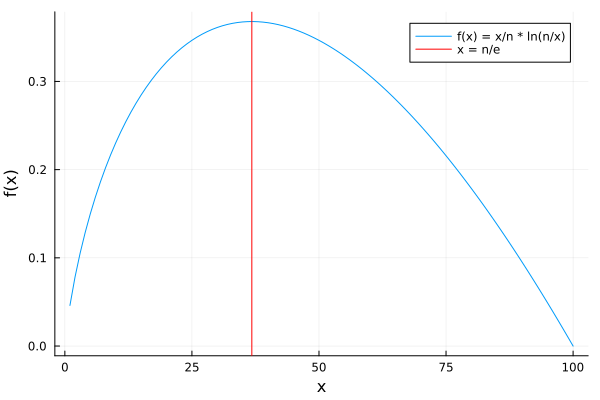

In [188]:
using Base.MathConstants: e

f(x, n) = (x / n) * log(n / x)

# Set the value of n
n = 100

x_values = 1:1:n

y_values = f.(x_values, n)

plot(x_values, y_values, label="f(x) = x/n * ln(n/x)", xlabel="x", ylabel="f(x)")

vline!([n/e], label="x = n/e", color=:red)



# Multivariate distributions

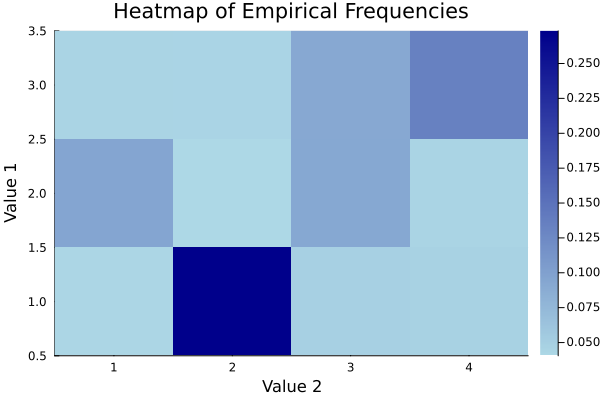

In [196]:

function simulate_joint_distribution(joint_distribution, num_samples)
 
    samples = [(i, j) for i in 1:size(joint_distribution)[1] for j in 1:size(joint_distribution)[2]]
    weights = reshape(joint_distribution, :)
    dist = Categorical(weights)
    empirical_distribution = zeros(size(joint_distribution))

    for _ in 1:num_samples
        idx = rand(dist)
        empirical_distribution[idx] += 1
    end

    empirical_distribution /= num_samples
    return empirical_distribution
end


num_samples = 10000

joint_distribution =     [0.05 0.30 0.05 0.05;
                          0.10 0.05 0.10 0.05;
                          0.05 0.05 0.10 0.15]
joint_distribution /= sum(joint_distribution)

# Simulate the joint distribution
empirical_distribution = simulate_joint_distribution(joint_distribution, num_samples)

# Create a heatmap of the empirical frequencies
heatmap(empirical_distribution, 
        c=:blues, 
        xlabel="Value 2", 
        ylabel="Value 1", 
        title="Heatmap of Empirical Frequencies")



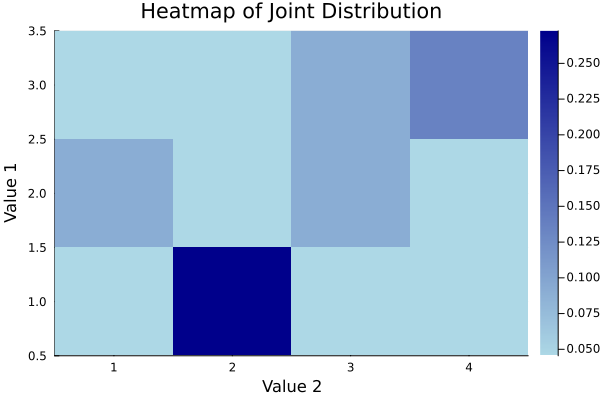

In [197]:
heatmap(joint_distribution, 
        c=:blues, 
        xlabel="Value 2", 
        ylabel="Value 1", 
        title="Heatmap of Joint Distribution") 

 Given two random variables $X,Y$, the covariance is defined as 
 
 $$ \mathbb{Cov}(X,Y) = \mathbb{E}(XY) -\mathbb{E}(X) \mathbb{E}(Y) $$
 
**Exercise**: compute the actual covariance for *joint_distribution*.

In [198]:
function compute_covariance(joint_distribution)
    rows, cols = size(joint_distribution)
    
    marginal_X = sum(joint_distribution, dims=2) ./ cols
    marginal_Y = sum(joint_distribution, dims=1) ./ rows
    
    # We assume here that:
    # X takes values in 1...rows 
    expected_X = sum((1:rows)' .* marginal_X) 
    # Y takes values in 1...cols 
    expected_Y = sum((1:cols) .* marginal_Y)
    
    # Compute the expected value of XY
    expected_XY = sum([i*j*joint_distribution[i,j] for i in 1:rows, j in 1:cols])
    
    # Compute the covariance
    covariance = expected_XY - expected_X * expected_Y
    
    return covariance
end
 

compute_covariance (generic function with 1 method)

In [199]:
compute_covariance(joint_distribution)

0.04545454545454497

In [202]:
scov =0.0 
num_samples = 10000
for _ ∈ 1:1000 
    scov+=compute_covariance(simulate_joint_distribution(joint_distribution, num_samples))
end
println(scov/1000)

0.046388099999999925


## Covariance matrix 


A covariance matrix (also known as auto-covariance matrix, dispersion matrix, variance matrix, or variance–covariance matrix) is a square matrix giving the covariance between each pair of elements of a given random vector. In other words, if we have a random vector with $n$ coordinates (simply meaning a collection of $n$ random variables $(X_1,\ldots,X_n)$) the covariance matrix is $n \times n$, and $K_{ij} = \mathbb{Cov}(X_i, X_j)$.  Notice that the diagonal elements are the variances of the $n$ random variables.


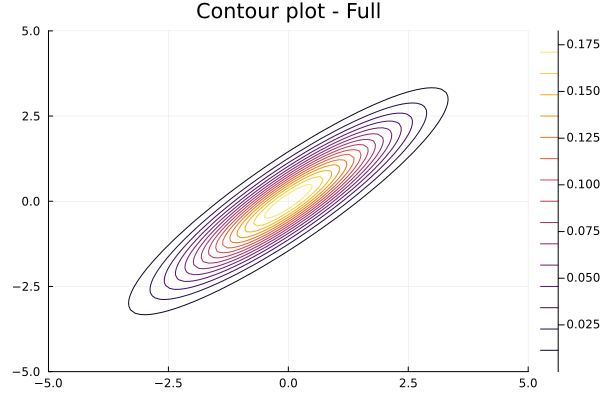

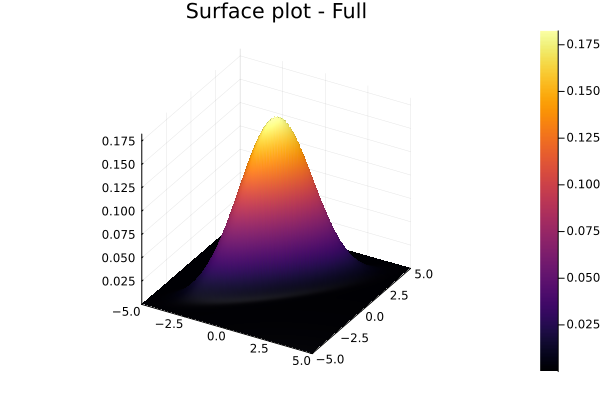

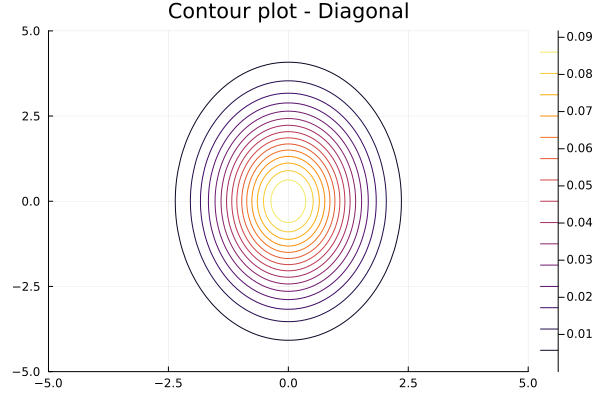

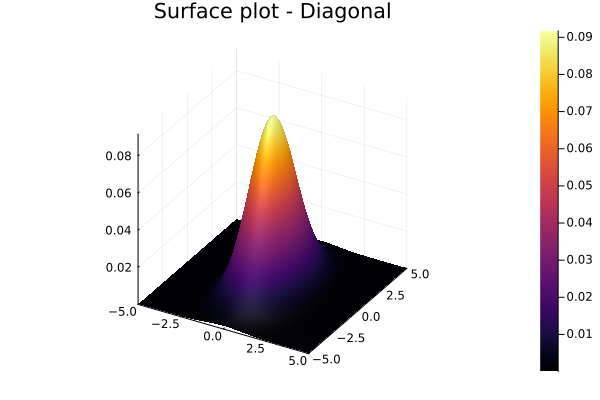

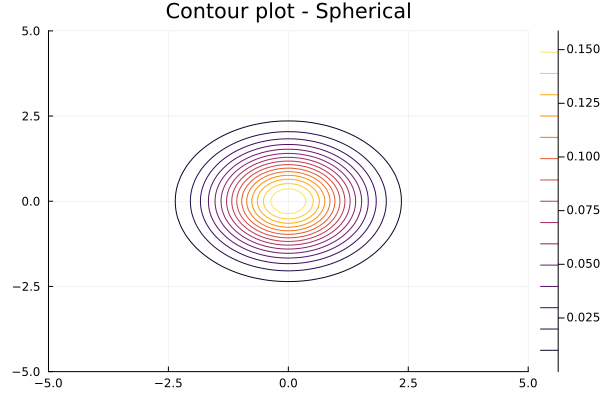

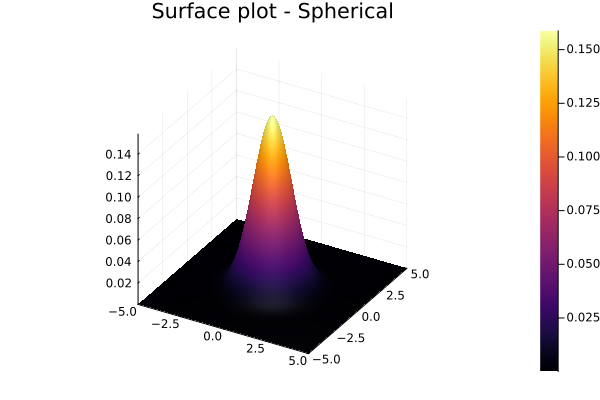

In [210]:
using Distributions
using Plots

# Define the Gaussians
gaussians = ["Full", "Diagonal", "Spherical"]

# Average and Covariance
avg = [0.0, 0.0]
covariances = Dict(
    "Full" => [2 1.8; 1.8 2],
    "Diagonal" => [1 0; 0 3],
    "Spherical" => [1 0; 0 1]
)

# Multivariate Gaussian PDF function
function gaussian_pdf(x, y, G)
    mvn = MvNormal(avg, covariances[G])
    return pdf(mvn, [x, y])
end

# Defining the meshgrid
start_point = -5
stop_point = 5
num_samples = 100
x_points = range(start_point, stop=stop_point, length=num_samples)
y_points = range(start_point, stop=stop_point, length=num_samples)

# Create a grid of x and y values
X = repeat(reshape(x_points, 1, :), length(y_points), 1)
Y = repeat(reshape(y_points, :, 1), 1, length(x_points))

# Plotting function
function make_plots(gauss)
    Z = gaussian_pdf.(X, Y, gauss)

    # Contour plot
    contour_plot = contour(x_points, y_points, Z, title="Contour plot - $gauss")

    # Surface plot
    surface_plot = surface(x_points, y_points, Z, title="Surface plot - $gauss")

    return contour_plot, surface_plot
end

# Generating plots for each Gaussian type
for gauss in gaussians
    contour_plot, surface_plot = make_plots(gauss)
    display(contour_plot)
    display(surface_plot)
end


# Entropy 

Here is a Julia code snippet for calculating the entropy of a single discrete random variable $X$ and the joint entropy of two discrete random variables $X$ and $Y$. The code assumes that you have the probability mass functions (PMFs) for  $X$ and the joint PMF for $X, Y$ as inputs.

 

Entropy is a measure of uncertainty or randomness in a random variable. For a discrete random variable $X$ with a probability mass function $p(x)$, the entropy, denoted $H(X)$, is defined as:

$$
H(X) = -\sum_{x} p(x) \log_2 p(x)
$$

where the sum is over all possible outcomes of $X$. The logarithm is base 2 because entropy is measured in bits.

For a joint distribution of two discrete random variables $X$ and $Y$, with a joint probability mass function 
$p(x, y)$, the joint entropy  $H(X, Y)$ is defined as:

$$
H(X, Y) = -\sum_{x, y} p(x, y) \log_2 p(x, y)
$$

The joint entropy measures the uncertainty in the entire system of two variables. It naturally extends to $n$ variables. Try to generalize. 

### Chain Rule for Entropy

For $n$ random variables, the chain rule for entropy provides a way to decompose the joint entropy into conditional entropies:

$$
H(X_1, X_2, \ldots, X_n) = H(X_1) + H(X_2 | X_1) + \ldots + H(X_n | X_1, X_2, \ldots, X_{n-1})
$$

This expresses the total entropy of a system as the sum of the entropy of the first variable and the conditional entropies of each subsequent variable given the previous variables.

---

Entropy is a fundamental concept in information theory and has applications in various fields, including communications, data compression, and machine learning.

In [203]:
using LinearAlgebra: dot

function entropy(probabilities::Vector{Float64})
    -dot(probabilities, log.(probabilities))
end

function joint_entropy(joint_probabilities::Matrix{Float64})
    -sum(joint_probabilities .* log.(joint_probabilities))
end

# Example usage:
# Single variable X with probabilities for each state
prob_X = [0.2, 0.3, 0.5]
entropy_X = entropy(prob_X)

# Joint distribution of two variables X and Y
joint_prob_XY = [0.1 0.1 0.1; 0.1 0.2 0.1; 0.05 0.05 0.2]
entropy_XY = joint_entropy(joint_prob_XY)

println("Entropy of X: $entropy_X")
println("Joint Entropy of X and Y: $entropy_XY")


Entropy of X: 1.0296530140645737
Joint Entropy of X and Y: 2.094640938826062
